In [76]:
# pip install pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
Dir_Main = "Users\Administrator\Desktop\AAE625_25\homework2"

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_14388\2427368003.py:1: SyntaxWarning: invalid escape sequence '\A'
  Dir_Main = "Users\Administrator\Desktop\AAE625_25\homework2"


In [78]:
# import the household income data in this folder, named "MEHOINUSA646N.csv"
import pandas as pd
data = pd.read_csv("MEHOINUSA646N.csv")
print(data.head())

  observation_date  MEHOINUSA646N
0       1984-01-01          22420
1       1985-01-01          23620
2       1986-01-01          24900
3       1987-01-01          26060
4       1988-01-01          27230


In [79]:
# import the data cpi_annual.csv
data_cpi = pd.read_csv("cpi_annual.csv")
# convert the first column to datetime
data_cpi['observation_date'] = pd.to_datetime(data_cpi['observation_date'])
data_cpi['Year'] = data_cpi['observation_date'].dt.year
print(data_cpi.head())

# create a new column named 'cpi_base2020' which is the cpi in 2020
data_cpi['cpi_base2020'] = data_cpi[data_cpi['Year'] == 2020]['CPIAUCSL'].values[0]
data_cpi['PriceIndx'] = data_cpi['CPIAUCSL'] / data_cpi['cpi_base2020'] *100
print(data_cpi.head())

# create a scatter plot of the data: x: year, y: real_value



  observation_date  CPIAUCSL  Year
0       1947-01-01    22.332  1947
1       1948-01-01    24.045  1948
2       1949-01-01    23.809  1949
3       1950-01-01    24.063  1950
4       1951-01-01    25.973  1951
  observation_date  CPIAUCSL  Year  cpi_base2020  PriceIndx
0       1947-01-01    22.332  1947       258.846   8.627524
1       1948-01-01    24.045  1948       258.846   9.289307
2       1949-01-01    23.809  1949       258.846   9.198133
3       1950-01-01    24.063  1950       258.846   9.296261
4       1951-01-01    25.973  1951       258.846  10.034152


In [80]:
data.head()
# convert the first column to datetime
data['observation_date'] = pd.to_datetime(data['observation_date'])
data['Year'] = data['observation_date'].dt.year
print(data.head())


  observation_date  MEHOINUSA646N  Year
0       1984-01-01          22420  1984
1       1985-01-01          23620  1985
2       1986-01-01          24900  1986
3       1987-01-01          26060  1987
4       1988-01-01          27230  1988


In [81]:
#Ensure the "Year" column in df_cpi is of integer type. If not, convert it to integer type.
data_cpi['Year'] = data_cpi['Year'].astype(int)

#merge the df_income and df_cpi
df_merge = pd.merge(data, data_cpi, on = 'Year', how = 'inner')
df_merge['real_income'] = df_merge['MEHOINUSA646N'] / df_merge['PriceIndx'] * 100 
df_merge.tail(5)




,observation_date_x,MEHOINUSA646N,Year,observation_date_y,CPIAUCSL,cpi_base2020,PriceIndx,real_income
35,2019-01-01,68700,2019,2019-01-01,255.653,258.846,98.766448,69558.034523
36,2020-01-01,68010,2020,2020-01-01,258.846,258.846,100.000000,68010.000000
37,2021-01-01,70780,2021,2021-01-01,270.966,258.846,104.682321,67614.091362
38,2022-01-01,74580,2022,2022-01-01,292.621,258.846,113.048299,65971.802024
39,2023-01-01,80610,2023,2023-01-01,304.701,258.846,117.715167,68478.856518


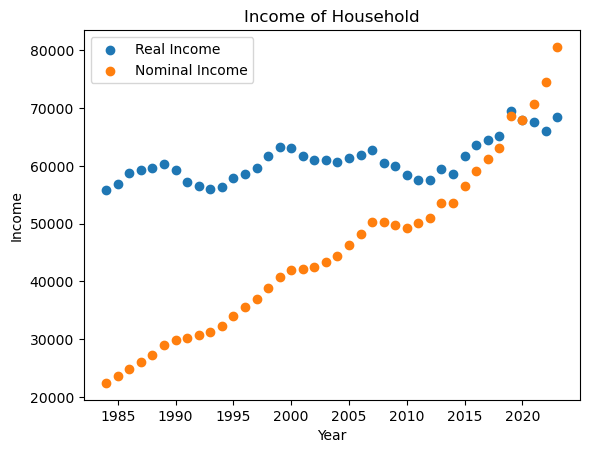

In [82]:
#create a scatter plot of the data: x: year, y: real_income 

# add MEHOINUSA646N to the plot
plt.scatter(df_merge['Year'], df_merge['real_income'], label = 'Real Income')
plt.scatter(df_merge['Year'], df_merge['MEHOINUSA646N'], label = 'Nominal Income')
plt.xlabel('Year')
plt.ylabel('Income')
plt.title('Income of Household')
plt.legend()
plt.show()



